# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [6]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height mean:', male_df['Height'].mean())
print('Male Height SD:', male_df['Height'].std())
print('Male Weight mean:', male_df['Weight'].mean())
print('Male Weight SD:', male_df['Weight'].std())
print('Female Height mean:', female_df['Height'].mean())
print('Female Height SD:', female_df['Height'].std())
print('Female Weight mean:', female_df['Weight'].mean())
print('Female Weight SD:', female_df['Weight'].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height SD: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight SD: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height SD: 2.6962840157650536
Female Weight mean: 135.86009300746835
Female Weight SD: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

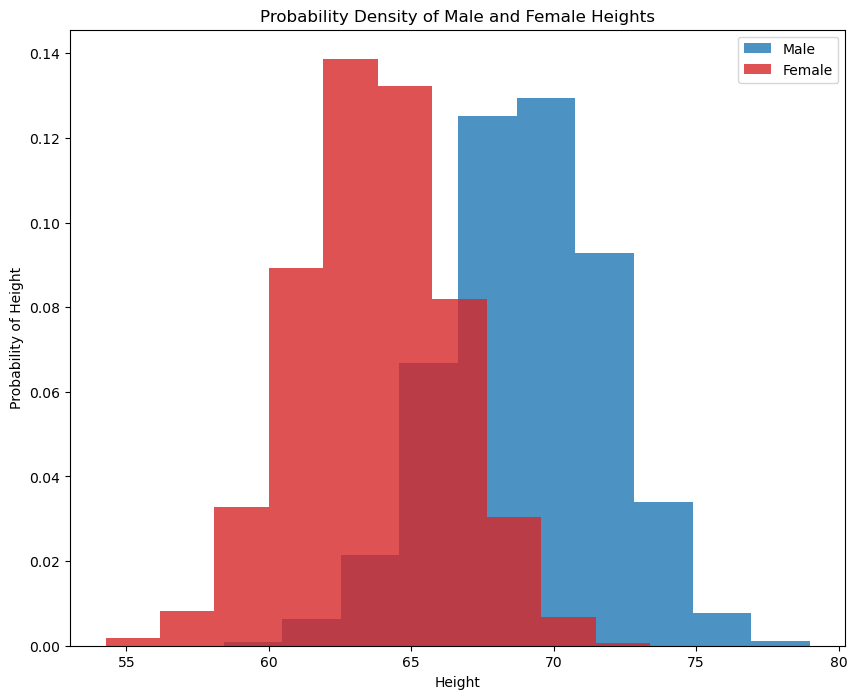

In [32]:
# Setting up shared axes
fig, ax = plt.subplots(figsize = (10,8))
binsize=10

ax.hist(male_df['Height'], bins=binsize, color="tab:blue", alpha=0.8, density=True, label='Male')

ax.hist(female_df['Height'], bins=binsize, color="tab:red", alpha=0.8, density=True, label='Female'
)

ax.set_title("Probability Density of Male and Female Heights")
ax.set_xlabel("Height")
ax.set_ylabel("Probability of Height")
plt.legend();


In [ ]:
# Record your observations - are these inline with your personal observations?


In [ ]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [21]:
n, bins = np.histogram(data.Height, 20, density=1)
n, bins

(array([0.00040428, 0.00145539, 0.00533644, 0.01228997, 0.02603534,
        0.04883648, 0.07034393, 0.08376588, 0.09031514, 0.08724265,
        0.08958744, 0.08562554, 0.07204189, 0.05829652, 0.0412361 ,
        0.02061805, 0.00970261, 0.00347677, 0.00153625, 0.00040428]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703558, 61.68381603, 62.92059648, 64.15737693, 65.39415738,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162054, 75.28840099, 76.52518144, 77.7619619 ,
        78.99874235]))

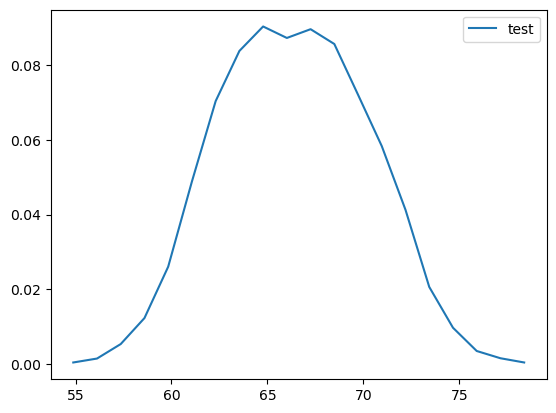

In [31]:
def density(x):
    n, bins = np.histogram(data.Height, 20, density=1)
    
    # Initialize numpy arrays according to number of bins with zeros
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighboring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy
    pass


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

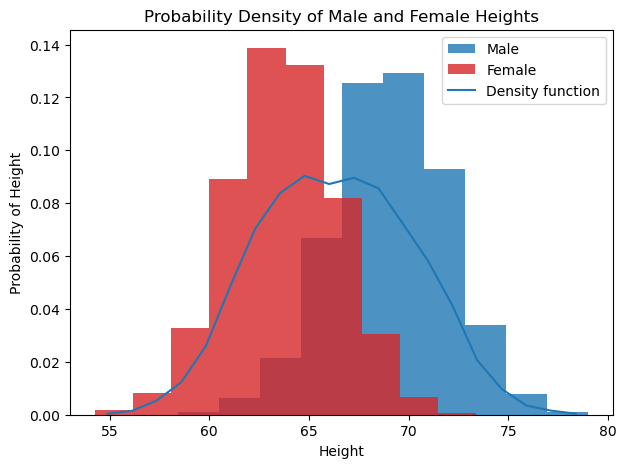

In [37]:
# Setting up shared axes
fig, ax = plt.subplots(figsize = (7,5))
binsize=10

ax.hist(male_df['Height'], bins=binsize, color="tab:blue", alpha=0.8, density=True, label='Male')

ax.hist(female_df['Height'], bins=binsize, color="tab:red", alpha=0.8, density=True, label='Female')

ax.plot(x, y, label = 'Density function')

ax.set_title("Probability Density of Male and Female Heights")
ax.set_xlabel("Height")
ax.set_ylabel("Probability of Height")
plt.legend();

## Repeat the above exercise for male and female weights

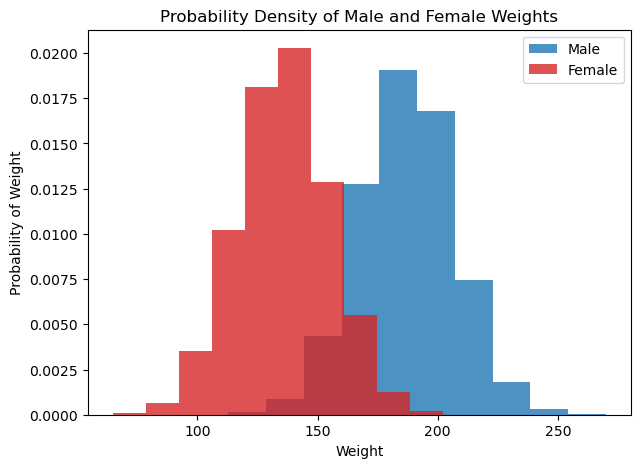

In [38]:
# Probability Density of Male and Female Weights
# Set up the shared axes
fig, ax = plt.subplots(figsize = (7,5))
binsize=10

ax.hist(male_df['Weight'], bins=binsize, color="tab:blue", alpha=0.8, density=True, label='Male')

ax.hist(female_df['Weight'], bins=binsize, color="tab:red", alpha=0.8, density=True, label='Female'
)

ax.set_title("Probability Density of Male and Female Weights")
ax.set_xlabel("Weight")
ax.set_ylabel("Probability of Weight")
plt.legend();

### Interpolation

In [41]:
n, bins = np.histogram(data.Weight, 20, density=1)
n, bins

(array([3.89693443e-05, 1.07165697e-04, 6.04024836e-04, 2.10434459e-03,
        4.52044394e-03, 7.56979513e-03, 1.00930602e-02, 1.10965208e-02,
        9.21624992e-03, 8.79732947e-03, 9.52800468e-03, 1.01125448e-02,
        9.53774701e-03, 7.48211410e-03, 4.09178115e-03, 1.73413582e-03,
        4.96859140e-04, 1.94846721e-04, 8.76810246e-05, 9.74233607e-06]),
 array([ 64.70012671,  74.9646053 ,  85.22908389,  95.49356248,
        105.75804107, 116.02251966, 126.28699825, 136.55147684,
        146.81595543, 157.08043402, 167.34491261, 177.6093912 ,
        187.87386979, 198.13834838, 208.40282697, 218.66730556,
        228.93178415, 239.19626274, 249.46074133, 259.72521992,
        269.98969851]))

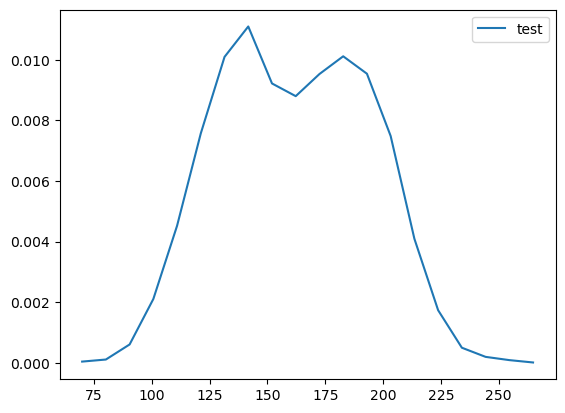

In [42]:
def density(x):
    n, bins = np.histogram(data.Weight, 20, density=1)
    
    # Initialize numpy arrays according to number of bins with zeros
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighboring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy
    pass


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

### Add overlapping density plots to the histograms

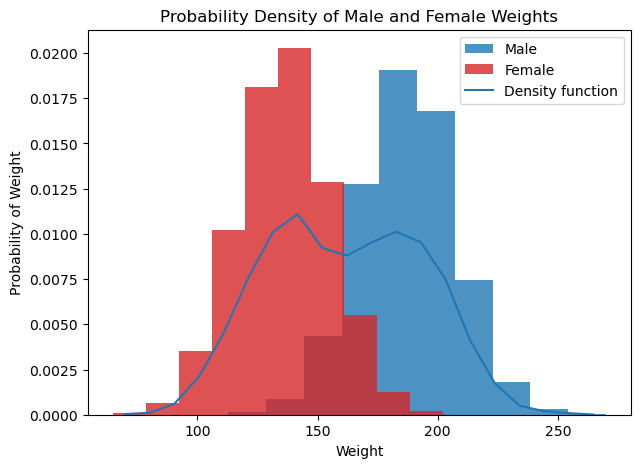

In [43]:
# Setting up shared axes
fig, ax = plt.subplots(figsize = (7,5))
binsize=10

ax.hist(male_df['Weight'], bins=binsize, color="tab:blue", alpha=0.8, density=True, label='Male')

ax.hist(female_df['Weight'], bins=binsize, color="tab:red", alpha=0.8, density=True, label='Female')

ax.plot(x, y, label = 'Density function')

ax.set_title("Probability Density of Male and Female Weights")
ax.set_xlabel("Weight")
ax.set_ylabel("Probability of Weight")
plt.legend();

## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

In [39]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

In [ ]:
# Code for heights here

In [ ]:
# Code for weights here

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

In [ ]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.